In [ ]:
#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's


This data was modified for this course and the link to the complete dataset can be found in the 
sklearn.datasets
 library


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2: Generate Descriptive Statistics and Visualizations

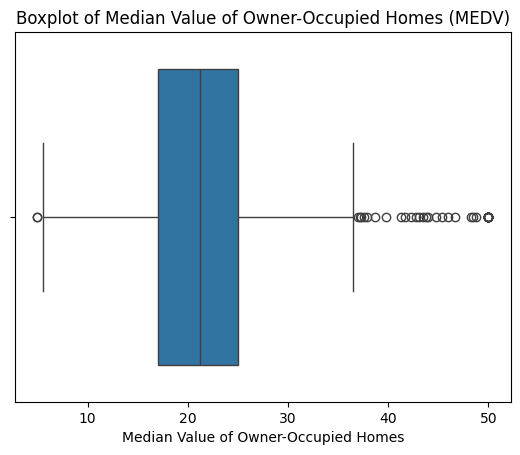

In [11]:
#Boxplot for the "Median value of owner-occupied homes" (MEDV):

sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value of Owner-Occupied Homes')
pyplot.show()


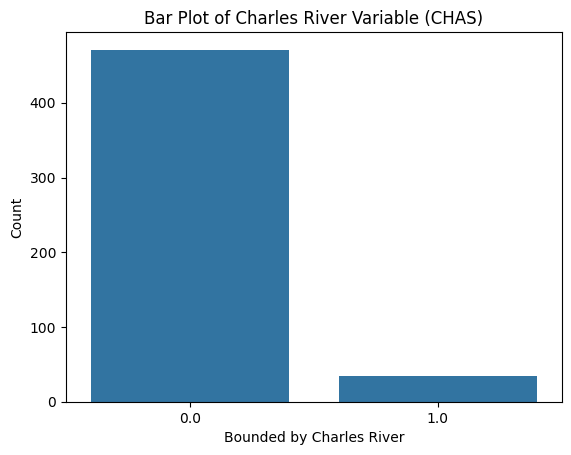

In [12]:
##Bar plot for the Charles river variable (CHAS):

sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('Bounded by Charles River')
pyplot.ylabel('Count')
pyplot.show()


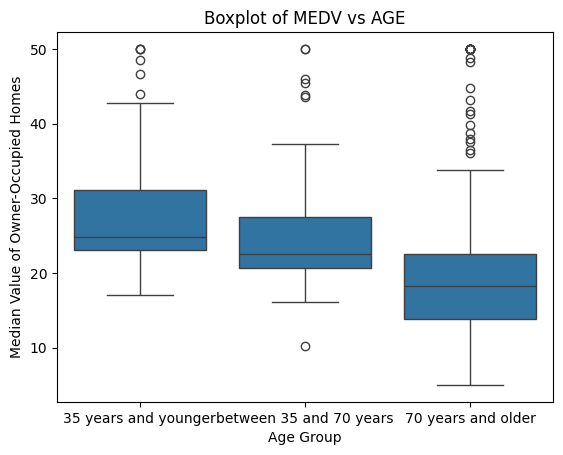

In [13]:
###Boxplot for MEDV vs AGE:

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()


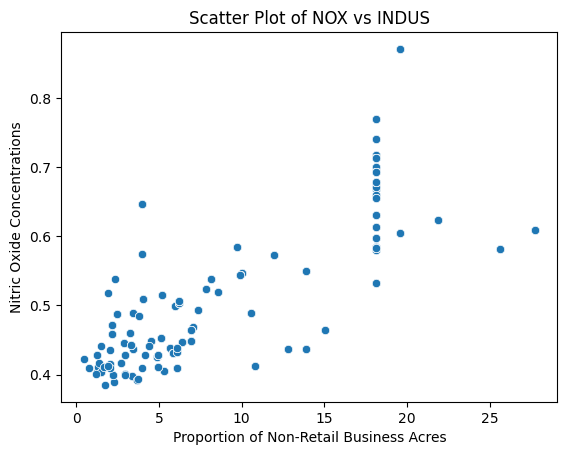

In [14]:
####Scatter plot for Nitric oxide concentrations (NOX) vs proportion of non-retail business acres (INDUS):

sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxide Concentrations')
pyplot.show()


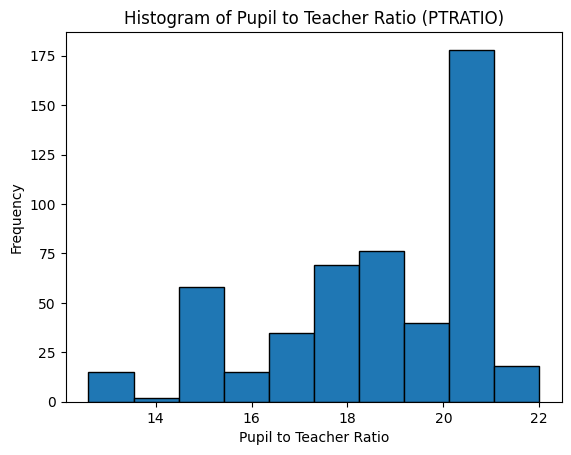

In [15]:
#####Histogram for the pupil to teacher ratio (PTRATIO):
pyplot.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()



#### Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Question 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples):

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by it.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.
Test Statistics: T-test for independent samples

Conclusion: We will perform a t-test for independent samples to compare the median values of houses bounded by the Charles river and those not bounded by it. We will then compare the calculated p-value to the significance level (α = 0.05). If the p-value is less than α, we reject the null hypothesis and conclude that there is a significant difference in median values.

In [16]:
## code

# Import necessary libraries
from scipy.stats import ttest_ind

# Split the dataset into two groups based on the Charles river variable
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_stat, p_value = ttest_ind(bounded_by_river, not_bounded_by_river)

# Compare the p-value to the significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in median values of houses bounded by the Charles river and those not bounded by it.")


Reject the null hypothesis.
There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.


#### Question 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA):

Hypothesis:

Null Hypothesis (H0): There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.
Test Statistics: Analysis of Variance (ANOVA)

Conclusion: We will perform an ANOVA test to determine if there is a statistically significant difference in median values of houses across different age groups. We will then compare the calculated p-value to the significance level (α = 0.05). If the p-value is less than α, we reject the null hypothesis and conclude that there is a significant difference in median values.



In [17]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Perform the ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract p-value from ANOVA table
p_value = anova_table['PR(>F)'][0]

# Compare the p-value to the significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in median values of houses across different age groups.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in median values of houses across different age groups.")


Reject the null hypothesis.
There is a significant difference in median values of houses across different age groups.


#### Question 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation):

Hypothesis:

Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Test Statistics: Pearson Correlation Coefficient

Conclusion: We will calculate the Pearson correlation coefficient between Nitric oxide concentrations and proportion of non-retail business acres per town. We will then compare the absolute value of the correlation coefficient to the critical value for significance level (α = 0.05). If the absolute value of the correlation coefficient is greater than the critical value, we reject the null hypothesis and conclude that there is a relationship.



In [18]:
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Compare the absolute value of the correlation coefficient to the critical value
alpha = 0.05
if abs(correlation_coefficient) > alpha:
    print("Reject the null hypothesis.")
    print("There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Reject the null hypothesis.
There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### Question 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis):

Hypothesis:

Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
Test Statistics: Multiple Linear Regression Analysis

Conclusion: We will perform multiple linear regression analysis to determine the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. We will then examine the p-value associated with the coefficient for the weighted distance variable. If the p-value is less than α = 0.05, we reject the null hypothesis and conclude that there is a significant impact.

In [19]:
# Fit a multiple linear regression model
X = sm.add_constant(boston_df['DIS'])  # Add a constant term to the predictor variable
y = boston_df['MEDV']  # Response variable

model = sm.OLS(y, X).fit()

# Examine the summary of the regression model
print(model.summary())

# Extract the p-value associated with the coefficient for the predictor variable
p_value = model.pvalues['DIS']

# Compare the p-value to the significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.21e-08
Time:                        15:35:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0